In [1]:
import os
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [180]:
# load SBML model
modelfile = os.getcwd()+'/models/240226MC_MS.sbml'
r = te.loadSBMLModel(modelfile)

In [89]:
metabolites = ['C00037', 'C00149', 'C00022', 'C00065']

In [90]:
S = r.getFullStoichiometryMatrix()
R = r.getReactionIds()
SP = r.getFloatingSpeciesIds()

RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [91]:
keep_rxn = np.zeros(S[0,:].shape)
for m in metabolites:
    keep_rxn = keep_rxn +  np.abs(S[m])
    
keep_rxn[keep_rxn>0] = 1
rmv_rxn = 1 - keep_rxn

In [92]:
removed_R = []
for k,i in enumerate(np.where(rmv_rxn)[0]):
    try:
        r.removeReaction(R[i],deleteUnusedParameters=False,forceRegenerate=False)
        removed_R.append(R[i])
    except Exception as e:
        print(e)
        pass
r.setConstant('rel0',True)

In [93]:
model_rxns = pd.read_csv(os.getcwd()+'/src/frenda_brenda/Files/Reaction.csv')
model_rxns['EC'] = model_rxns['EC'].apply(lambda x: 'EC'+x.replace('.',''))
r_to_ec_map = {l:ec for l,ec in zip(model_rxns['Label'],model_rxns['EC'])}

removed_E = []
for rid in removed_R:
    if r_to_ec_map[rid] not in [r_to_ec_map[rid2] for rid2 in r.getReactionIds()]:
        try:
            removed_E.append(r_to_ec_map[rid])
        except:
            pass
removed_E = np.unique(removed_E)

In [94]:
r.getReactionIds()

['R26',
 'R27',
 'R28',
 'R29',
 'R30',
 'R31',
 'R32',
 'R33',
 'R34',
 'R43',
 'R44',
 'R45',
 'R64',
 'R65',
 'R146',
 'R147',
 'R151',
 'R152',
 'R153',
 'R154',
 'R155',
 'R156',
 'R157',
 'R158',
 'R159',
 'R160',
 'R162',
 'R164',
 'R165',
 'R167',
 'R168',
 'R169',
 'R171',
 'R173',
 'R175',
 'R176',
 'R177']

In [109]:
keep_sp = np.abs(S[len([s for s in SP if 'EC' in s]):,np.where(keep_rxn)[0]]).sum(axis=1)
keep_sp[keep_sp>0] = 1
rmv_sp = 1 - keep_sp
removed_S = [s for s,i in zip([s for s in SP if 'EC' not in s],rmv_sp) if i]
removed_S.extend(removed_E)

In [85]:
removed_S = []
for k,i in enumerate([s for s,i in zip([s for s in SP if 'EC' not in s],rmv_sp) if i]):
    try:
        print(i)
        print(np.where(S[i])[0] in np.where(keep_rxn)[0])
        r.removeSpecies(i,forceRegenerate=False)
        removed_S.append(i)
        if len(r.getReactionIds()) < 37:
            print('sos')
            break
    except Exception as e:
        print(e)
        pass

for i in removed_E:
    try:
        r.removeSpecies(i,forceRegenerate=False)
    except Exception as e:
        print(e)
        pass
r.setConstant('rel0',True)

C12214
False
C00111
False
C00345
False
C00005
False
C00390
False
C01172
False
C05747
False
C05760
False
C04688
False
C05378
False
C05223
False
C05749
False
C05345
False
C05381
False
C00103
False
C05746
False
C00322
False
C05259
False
C00229
False
C00136
False
C05748
False
C00347
False
C16470
False
C00249
False
C00369
False
C03069
False
C00236
False
C00026
False
C16219
False
C04633
False
C03344
False
C03356
False
C16389
False
C00447
False
C05270
False
C16339
False
C16335
False
C00118
False
C05764
False
C03735
False
C06157
False
C13378
False
C05274
False
C05755
False
C00577
False
C16169
False
C16334
False
C00279
False
C00042
False
C01832
False
C16338
False
C04419
False
C05752
False
C00668
False
C03785
False
C00085
False
C05269
False
C00197
False
C02232
False
C05754
False
C05265
False
C01094
False
C00531
False
C16254
False
C04246
False
C00100
False
C00490
False
C16220
False
C00685
False
C05758
False
C01097
False
C05763
False
C01944
False
C00006
False
C07118
False
C16173
False
C00173
False

C:\Users\Diego Alba\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



In [96]:
removed_S

['C12214',
 'C00111',
 'C00345',
 'C00005',
 'C00390',
 'C01172',
 'C05747',
 'C05760',
 'C04688',
 'C05378',
 'C05223',
 'C05749',
 'C05345',
 'C05381',
 'C00103',
 'C05746',
 'C00322',
 'C05259',
 'C00229',
 'C00136',
 'C05748',
 'C00347',
 'C16470',
 'C00249',
 'C00369',
 'C03069',
 'C00236',
 'C00026',
 'C16219',
 'C04633',
 'C03344',
 'C03356',
 'C16389',
 'C00447',
 'C05270',
 'C16339',
 'C16335',
 'C00118',
 'C05764',
 'C03735',
 'C06157',
 'C13378',
 'C05274',
 'C05755',
 'C00577',
 'C16169',
 'C16334',
 'C00279',
 'C00042',
 'C01832',
 'C16338',
 'C04419',
 'C05752',
 'C00668',
 'C03785',
 'C00085',
 'C05269',
 'C00197',
 'C02232',
 'C05754',
 'C05265',
 'C01094',
 'C00531',
 'C16254',
 'C04246',
 'C00100',
 'C00490',
 'C16220',
 'C00685',
 'C05758',
 'C01097',
 'C05763',
 'C01944',
 'C00006',
 'C07118',
 'C16173',
 'C00173',
 'C01271',
 'C04620',
 'C05761',
 'C00620',
 'C12215',
 'C00199',
 'C00158',
 'C16331',
 'C05753',
 'C16330',
 'C00091',
 'C05759',
 'C00311',
 'C00693',

In [97]:
model_species = pd.read_csv(os.getcwd()+'/src/frenda_brenda/Files/SpeciesBaseMechanisms.csv')
c_to_v_map = {s:model_species.loc[model_species['Label'] == s, 'Relative'].values[0] for s in [s for s in S.rownames if 'EC' not in s]}

removed_V = []
for s in removed_S:
    try:
        removed_V.append(c_to_v_map[s])
    except:
        pass

In [112]:
for p in r.getGlobalParameterIds():
    if np.any([i in p.split('_') for i in removed_S+removed_R+removed_V]):
        try:
            r.removeParameter(p, forceRegenerate = False)
        except Exception as e:
            print(e)
        pass
r.setConstant('rel0',True)

In [137]:
sum(['v' in i for i in r.getGlobalParameterIds()])

105

In [144]:
np.unique([i.split('_')[1] for i in r.getGlobalParameterIds() if 'Ki' in i])

array(['C00002', 'C00004', 'C00008', 'C00009', 'C00010', 'C00020',
       'C00022', 'C00024', 'C00025', 'C00036', 'C00041', 'C00044',
       'C00048', 'C00074', 'C00122', 'C00168', 'C00209', 'C00302',
       'C00389', 'C00552', 'C00704', 'C00712', 'C00741', 'C00742',
       'C01401', 'C02441', 'C05625', 'C11592', 'C16487', 'C20679'],
      dtype='<U6')

In [132]:
'C02441' in r.getFloatingSpeciesIds()

False

In [138]:
sum(keep_rxn)

37.0

In [139]:
'C00741' in removed_S

False

In [146]:
sum(keep_rxn)

37.0

In [147]:
S.shape

(247, 161)

In [157]:
sum(['EC' in i for i in r.getGlobalParameterIds()])

19

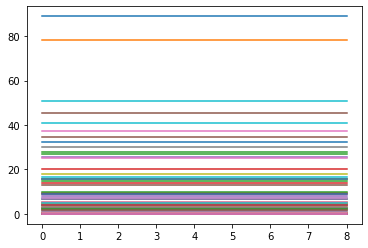

In [156]:
plt.plot(r.simulate(0,90000,9).__array__()[:,1:])

array(['C00002', 'C00004', 'C00008', 'C00009', 'C00010', 'C00020',
       'C00022', 'C00024', 'C00025', 'C00036', 'C00041', 'C00044',
       'C00048', 'C00074', 'C00122', 'C00168', 'C00209', 'C00302',
       'C00389', 'C00552', 'C00704', 'C00712', 'C00741', 'C00742',
       'C01401', 'C02441', 'C05625', 'C11592', 'C16487', 'C20679'],
      dtype='<U6')

In [160]:
with open('models/240226MC_MS.sbml', 'w') as f:
    # Write the data to the file
    f.write(r.getCurrentSBML())

In [166]:
np.any([k in r.getGlobalParameterIds()[5] for k in ['Ki','Gi']])

False

In [179]:
len(r.getFloatingSpeciesIds())

247

In [185]:
sum([i in r.getFloatingSpeciesIds() for i in np.unique([i.split('_')[1] for i in r.getGlobalParameterIds() if np.any([k in i for k in ['Ki','Gi']])])])

12